## 05 local wind

* 24 hrs
* Forced with local 2 hr half-gaussian wind event (instead of a 4hr event) alongshore, upwelling favourable
* winter stratification
* tangential vel at boundaries set to zero
* no sponge
* Output every 10 min

In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks/')
import svb_tools as svb

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
bathy_file1 = '/Volumes/AHAB/SVB_runs/01_320x454x36_gaussian/05_localwind/gridGlob.nc'
state_file1 = '/Volumes/AHAB/SVB_runs/01_320x454x36_gaussian/05_localwind/stateGlob.nc'

### Load bathymetry variables

In [4]:
with Dataset(bathy_file1, 'r') as nbl:
    lat = nbl.variables['Y'][:]
    lon = nbl.variables['X'][:]
    Z = nbl.variables['Z'][:]
    depth = nbl.variables['Depth'][:]
    # centers mask
    hFacC = nbl.variables['HFacC'][:]
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)
    # U mask
    hFacW = nbl.variables['HFacW'][:]
    hfacW = np.ma.masked_values(hFacW, 0)
    maskU = np.ma.getmask(hfacW)
    # V mask
    hFacS = nbl.variables['HFacS'][:]
    hfacS = np.ma.masked_values(hFacS, 0)
    maskV = np.ma.getmask(hfacS)
    # masked depth
    dep_masked = np.ma.masked_values(depth,0)
    mask_dep = np.ma.getmask(dep_masked)

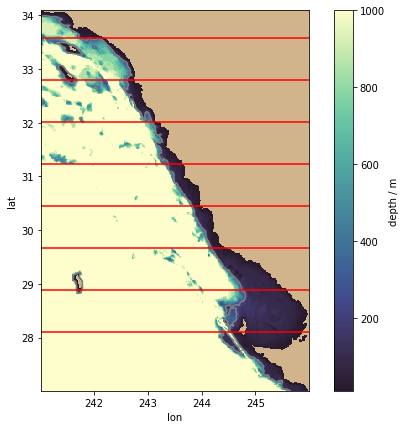

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120

# ssh transects
ax.plot(lon[:],lat[lat_ind1]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+50]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+100]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+150]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+200]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+250]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+300]*np.ones_like(lon),'r-')

# sponge widths
#ax.plot(lon[10]*np.ones_like(lat),lat[:],'-', color='orange')
#ax.plot(lon[:],lat[10]*np.ones_like(lon),'-', color='orange')
#ax.plot(lon[:],lat[-10]*np.ones_like(lon),'-', color='orange')



cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

### Surface fields

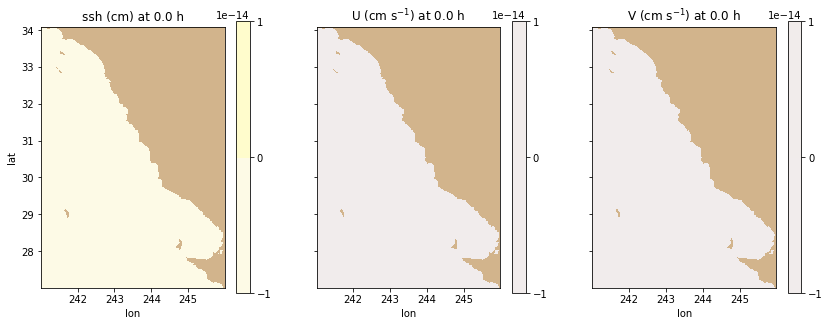

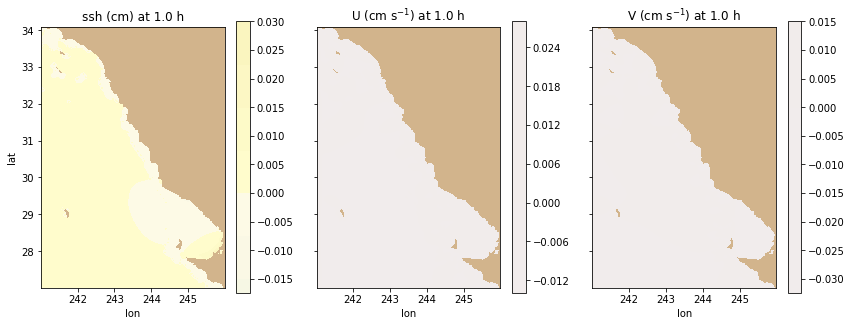

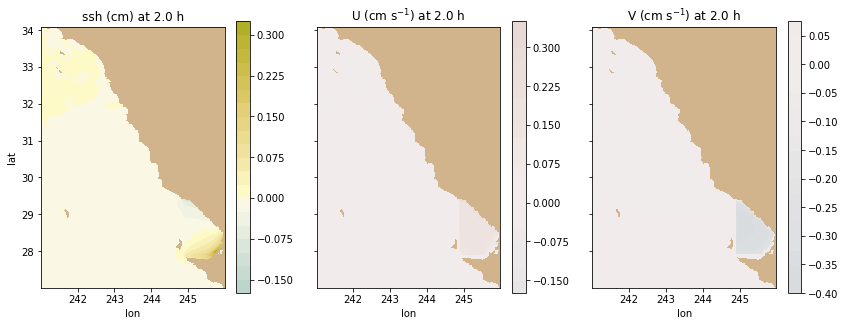

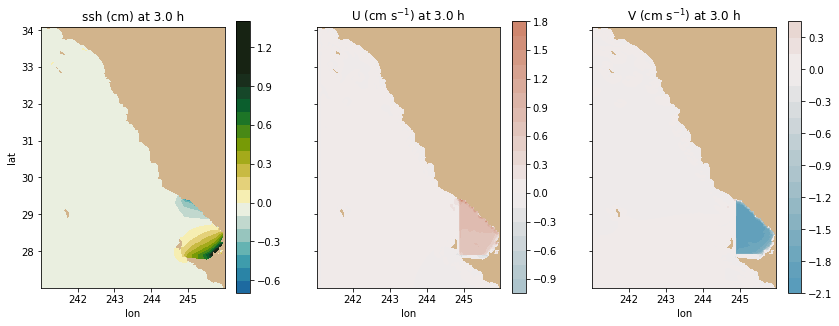

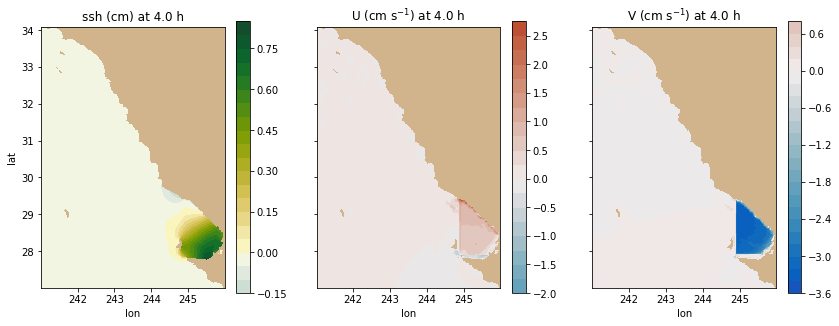

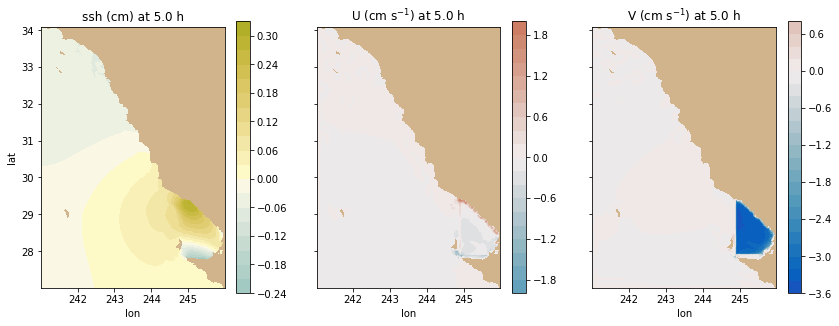

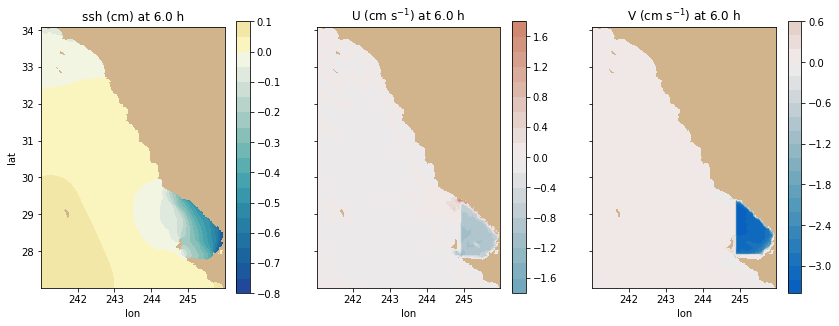

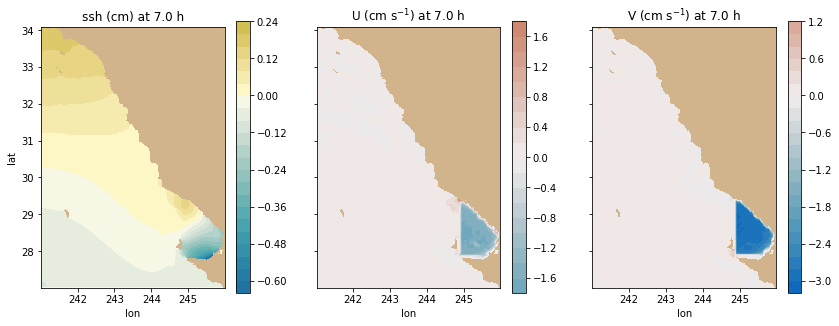

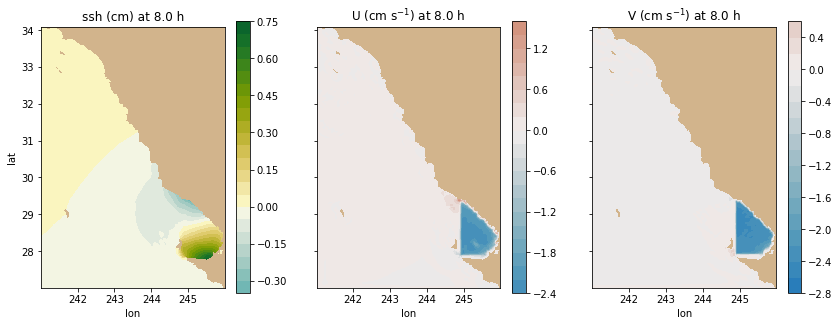

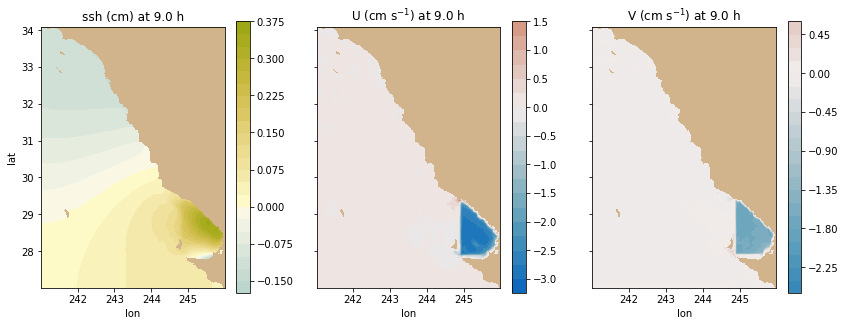

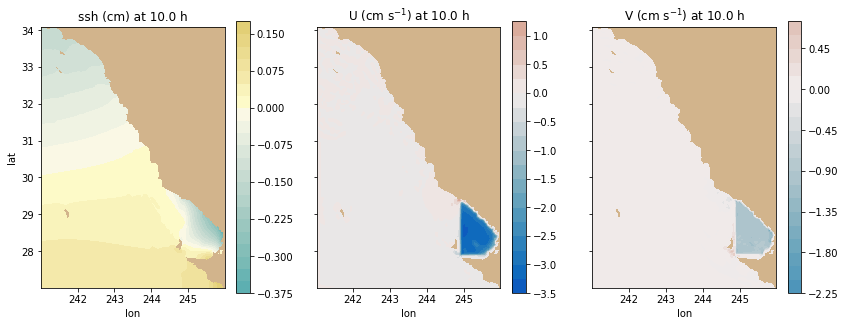

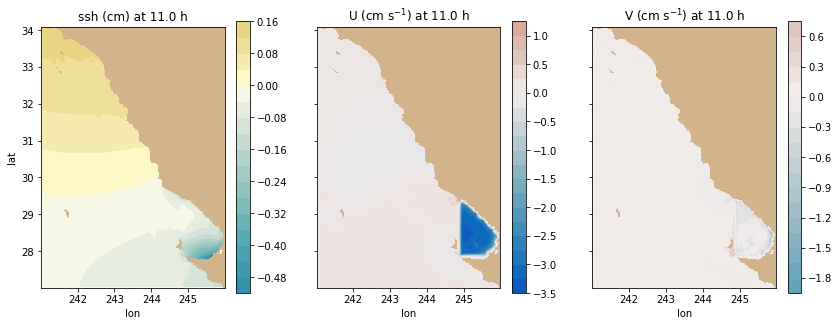

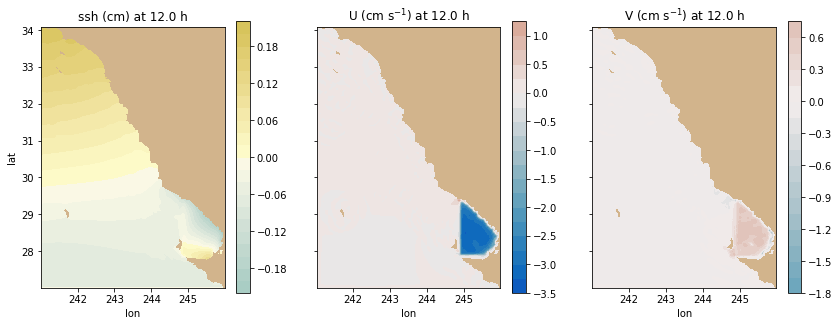

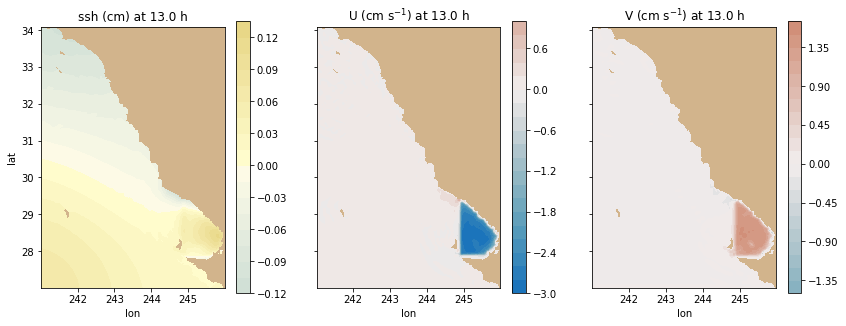

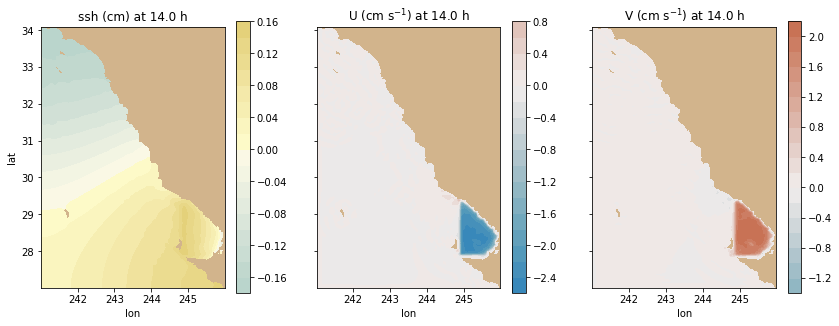

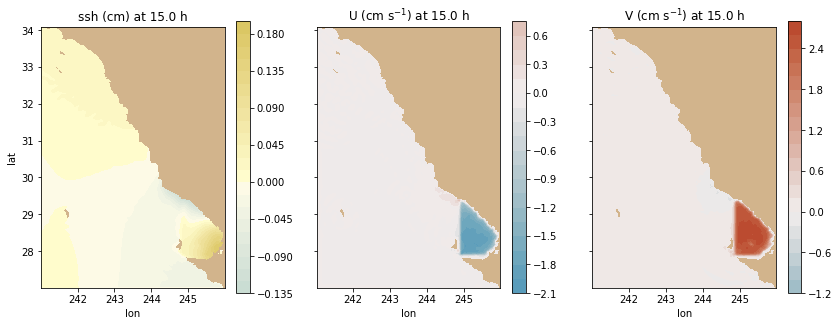

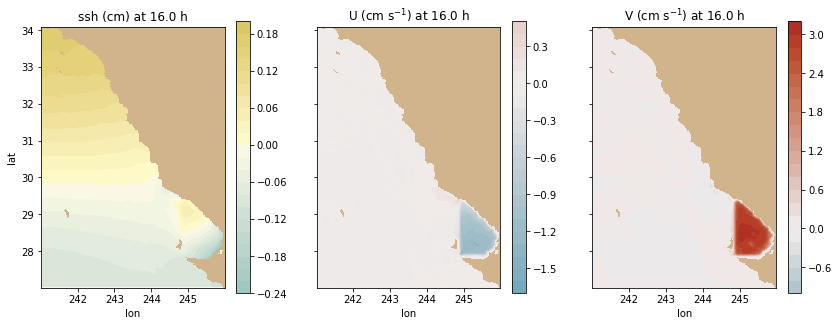

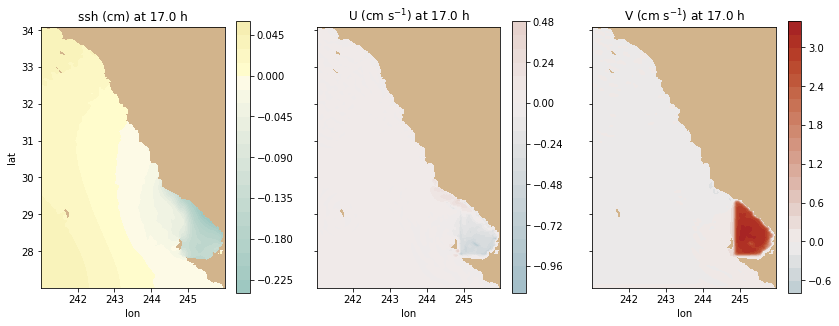

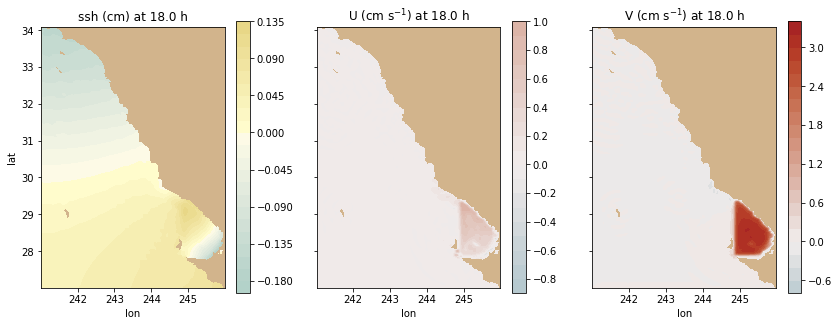

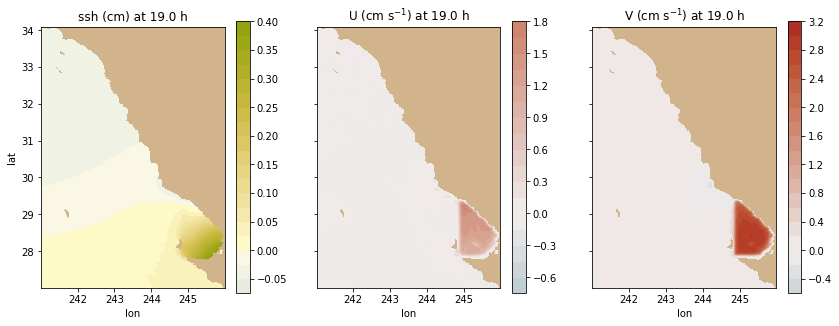

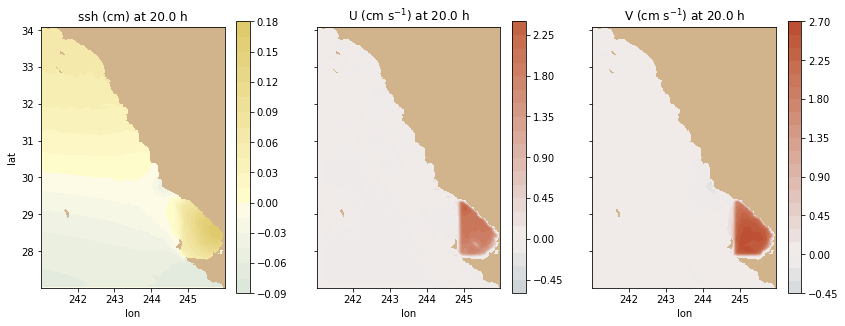

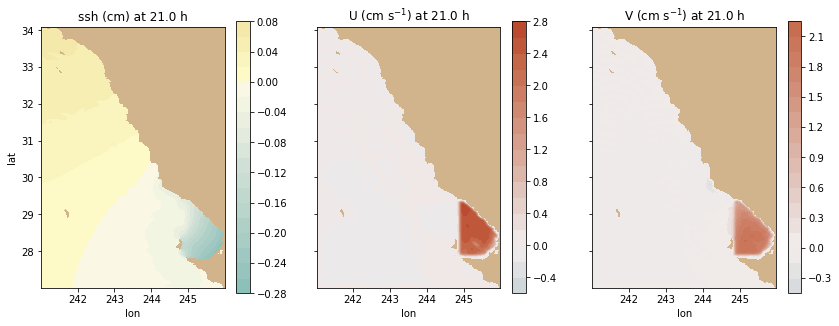

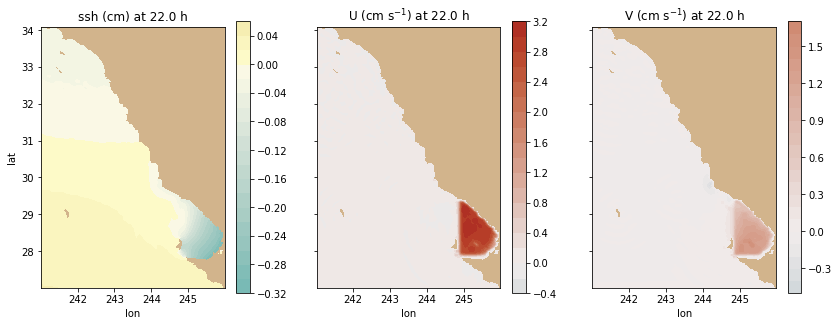

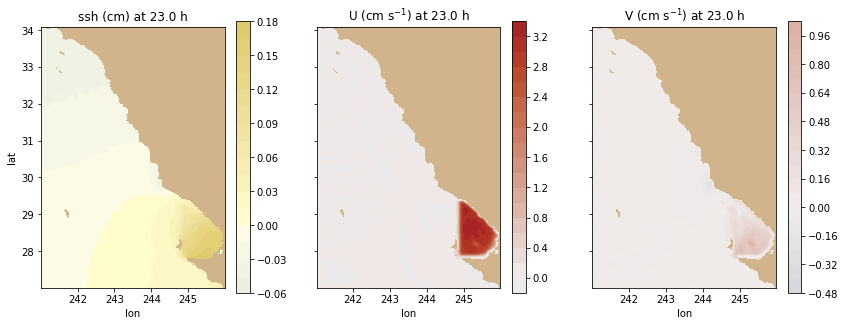

In [6]:
zz=0
state_file= state_file1
time_indexes = range(0,144,6)
svb.plot_level_vars(state_file1, lon, lat, mask, time_indexes, zz=0)

### Cross-sections along red lines in map

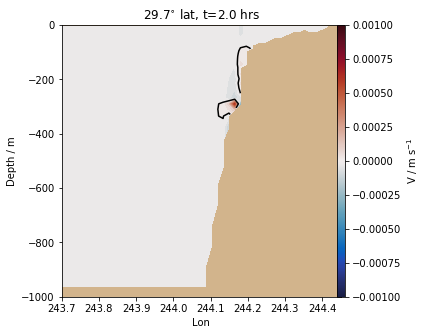

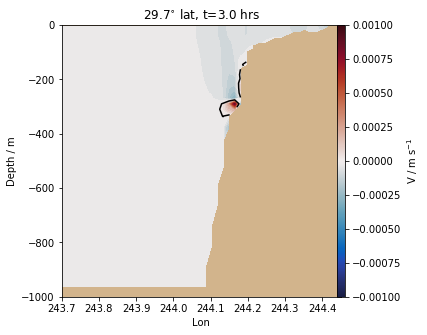

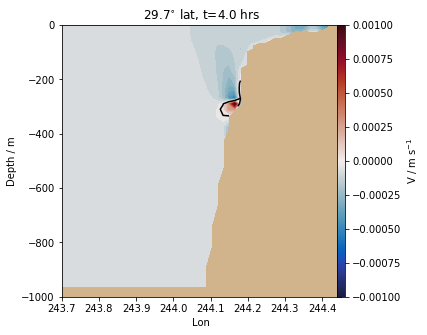

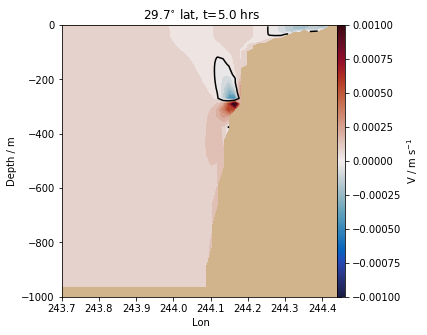

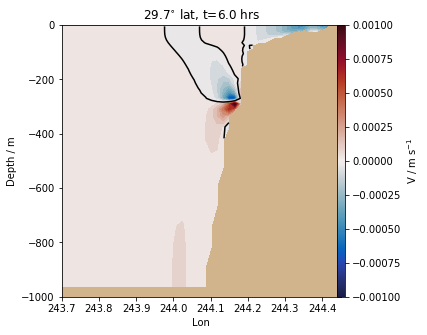

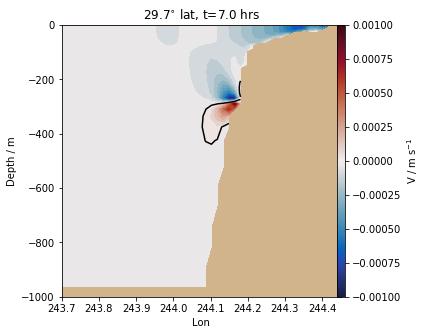

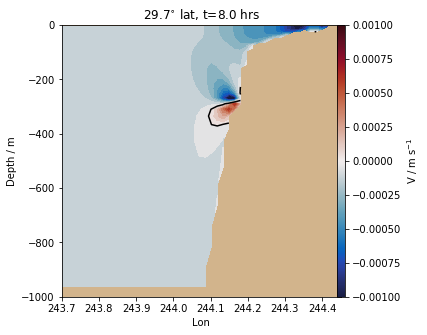

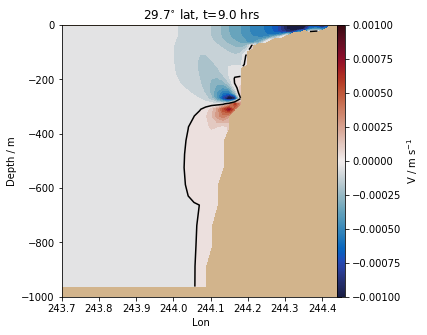

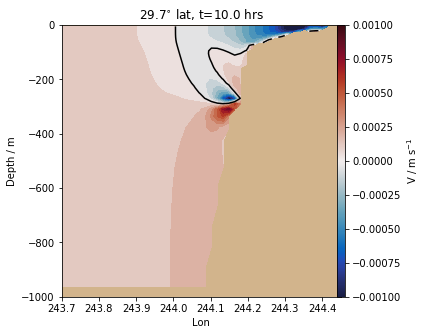

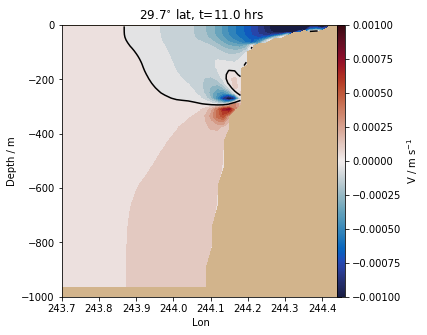

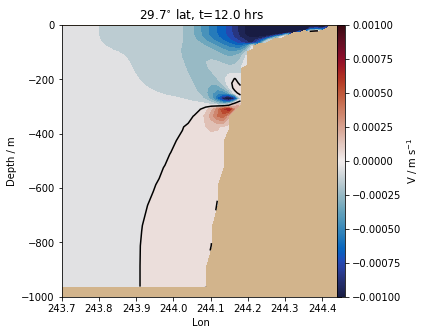

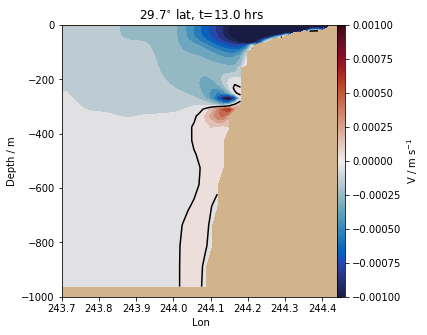

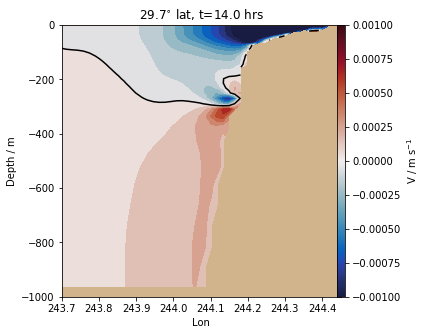

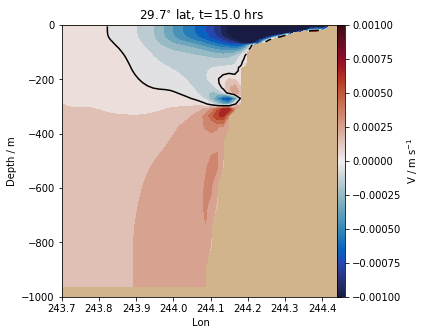

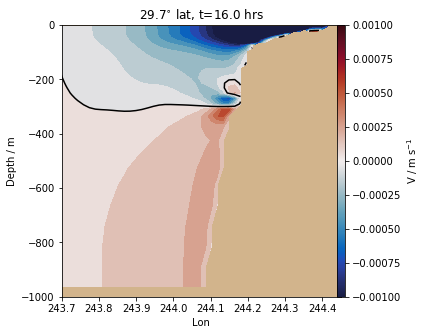

In [7]:
Tmin = -0.001
Tmax = 0.001
Tcmap = cmo.cm.balance

times = range(12,100,6)
for tt in times:
    svb.plot_zonal_CS(state_file1,lon,lat,Z,tt,lat_ind2+50,'V',r'V / m s$^{-1}$',Tcmap, 
                      Tmin, Tmax, maskV, xlim1=243.7, xlim2=244.45)

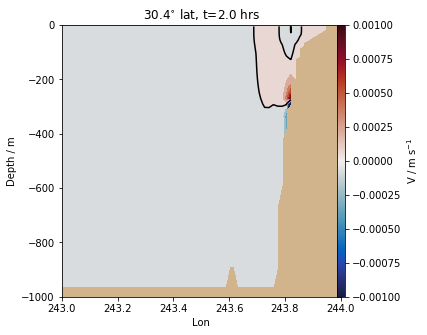

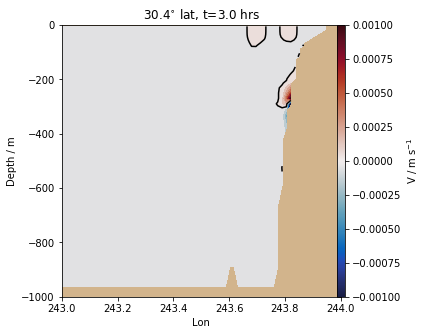

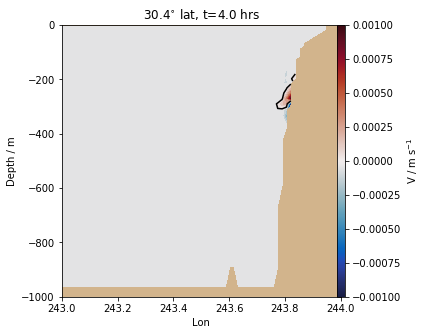

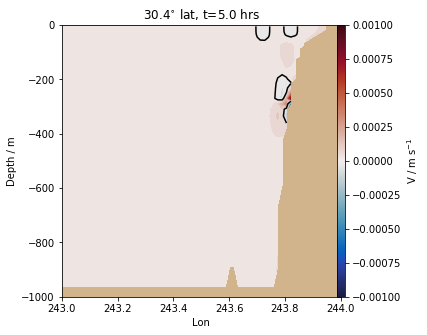

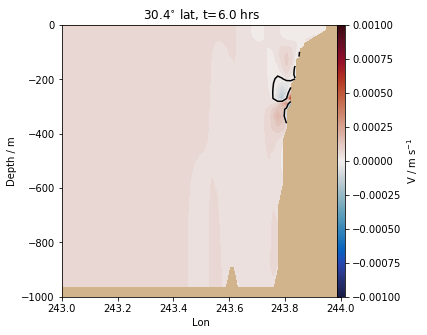

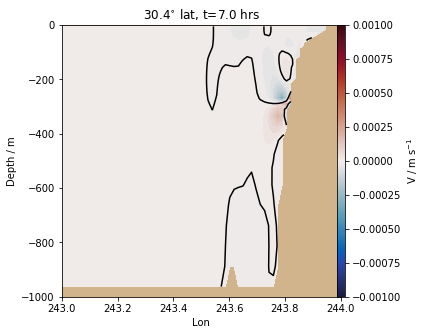

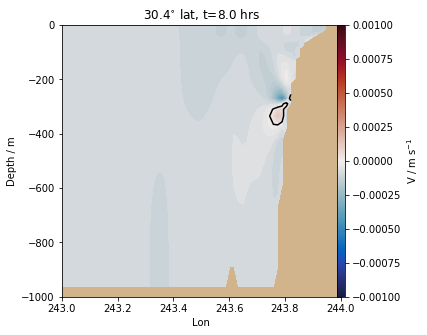

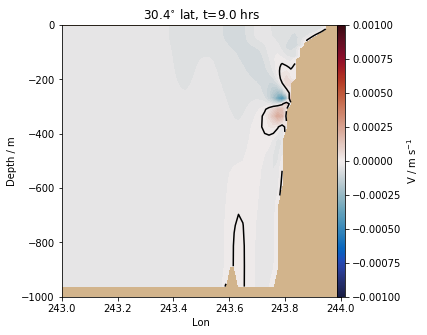

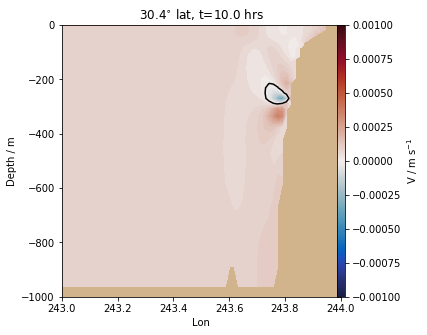

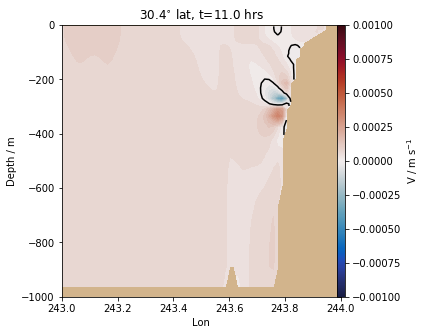

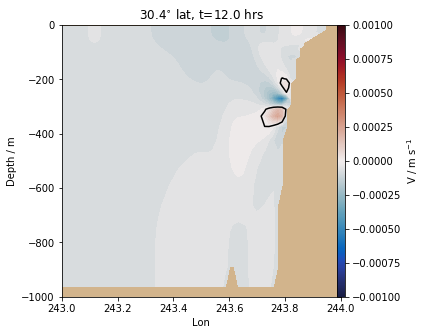

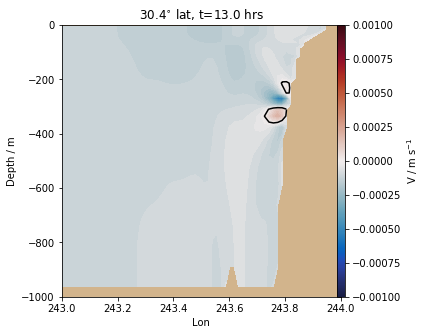

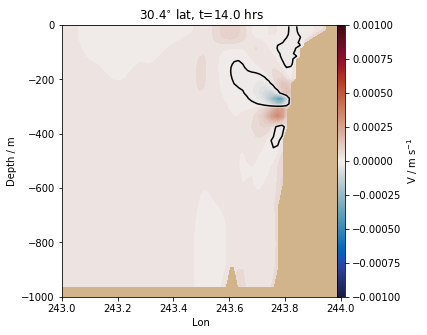

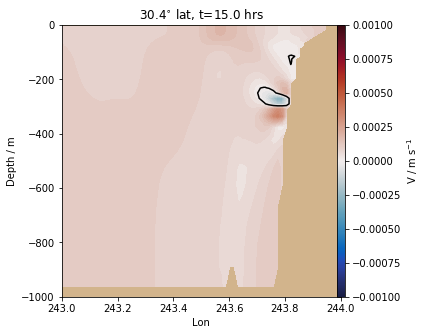

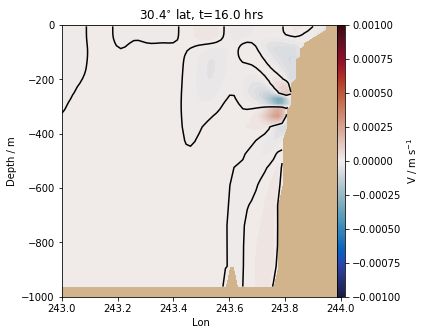

In [8]:
Tmin = -0.001
Tmax = 0.001
Tcmap = cmo.cm.balance

times = range(12,100,6)
for tt in times:
    svb.plot_zonal_CS(state_file1,lon,lat,Z,tt,lat_ind2+100,'V',r'V / m s$^{-1}$',Tcmap, 
                      Tmin, Tmax, maskV, xlim1=243., xlim2=244.0)

### Hovmoller plots

Text(0.5, 0, 'lon')

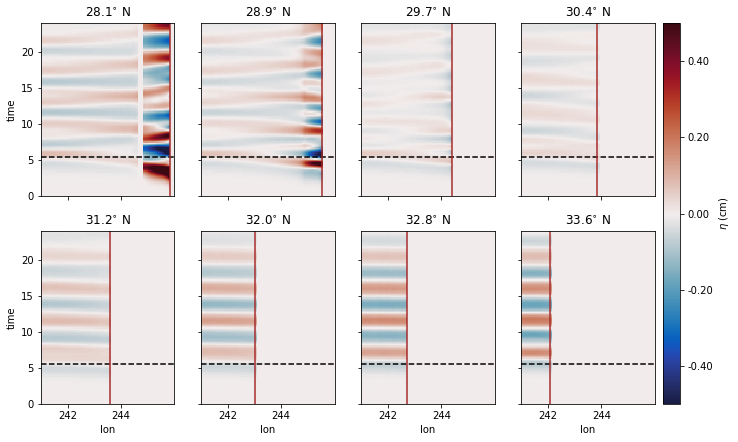

In [9]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(11,7), sharey=True,sharex=True)
ax1.axhline(5.5, color='k', linestyle='--')
ax2.axhline(5.5, color='k', linestyle='--')
ax3.axhline(5.5, color='k', linestyle='--')
ax4.axhline(5.5, color='k', linestyle='--')
ax5.axhline(5.5, color='k', linestyle='--')
ax6.axhline(5.5, color='k', linestyle='--')
ax7.axhline(5.5, color='k', linestyle='--')
ax8.axhline(5.5, color='k', linestyle='--')

with Dataset(state_file1, 'r') as nbl:
    eta1 = nbl.variables['Eta'][:,lat_ind1,:]
    time = nbl.variables['T'][:]
    eta2 = nbl.variables['Eta'][:,lat_ind2,:]
    eta3 = nbl.variables['Eta'][:,lat_ind2+50,:]
    eta4 = nbl.variables['Eta'][:,lat_ind2+100,:]
    eta5 = nbl.variables['Eta'][:,lat_ind2+150,:]
    eta6 = nbl.variables['Eta'][:,lat_ind2+200,:]
    eta7 = nbl.variables['Eta'][:,lat_ind2+250,:]
    eta8 = nbl.variables['Eta'][:,lat_ind2+300,:]

ax1.pcolormesh(lon,time/3600,(eta1)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax2.pcolormesh(lon,time/3600,(eta2)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax3.pcolormesh(lon,time/3600,(eta3)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
cb = ax4.pcolormesh(lon,time/3600,(eta4)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax5.pcolormesh(lon,time/3600,(eta5)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax6.pcolormesh(lon,time/3600,(eta6)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax7.pcolormesh(lon,time/3600,(eta7)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax8.pcolormesh(lon,time/3600,(eta8)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)

norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.2f',label='$\eta$ (cm)')

inds = [lat_ind1, lat_ind2,lat_ind2+50,lat_ind2+100,lat_ind2+150,
        lat_ind2+200,lat_ind2+250,lat_ind2+300]
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind, ax in zip(inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])

ax1.axvline(lon[-12], color='brown')
ax2.axvline(lon[-30], color='brown')
ax3.axvline(lon[-104], color='brown')
ax4.axvline(lon[-139], color='brown')
ax5.axvline(lon[-154], color='brown')
ax6.axvline(lon[-190], color='brown')
ax7.axvline(lon[-211], color='brown')
ax8.axvline(lon[-251], color='brown')

ax1.set_ylabel('time')
ax5.set_ylabel('time')
ax5.set_xlabel('lon')
ax6.set_xlabel('lon')
ax7.set_xlabel('lon')
ax8.set_xlabel('lon')

Text(0.5, 1.0, 'Local upwelling winds, 2h ramp up - winter stratification')

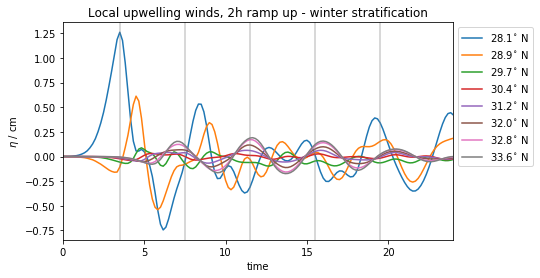

In [12]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

with Dataset(state_file1, 'r') as nbl:
    eta1 = nbl.variables['Eta'][:,lat_ind1,-12]
    time = nbl.variables['T'][:]
    eta2 = nbl.variables['Eta'][:,lat_ind2,-30]
    eta3 = nbl.variables['Eta'][:,lat_ind2+50,-104]
    eta4 = nbl.variables['Eta'][:,lat_ind2+100,-139]
    eta5 = nbl.variables['Eta'][:,lat_ind2+150,-154]
    eta6 = nbl.variables['Eta'][:,lat_ind2+200,-190]
    eta7 = nbl.variables['Eta'][:,lat_ind2+250,-211]
    eta8 = nbl.variables['Eta'][:,lat_ind2+300,-251]

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind in zip(etas, inds):
    ax1.plot(time/3600,(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])


for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Local upwelling winds, 2h ramp up - winter stratification')

Text(0.5, 1.0, 'Local upwelling winds, 2h ramp up - winter stratification')

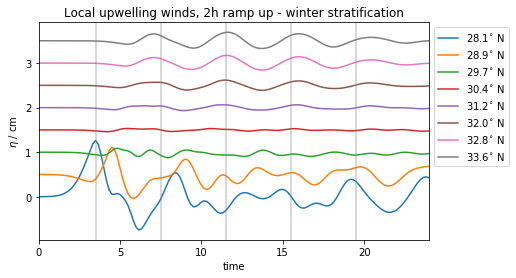

In [15]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind, off in zip(etas, inds, range(len(etas))):
    ax1.plot(time/3600,(0.5*off)+(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])


for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Local upwelling winds, 2h ramp up - winter stratification')

Text(0.5, 1.0, 'Local upwelling winds, 2h ramp up - winter stratification')

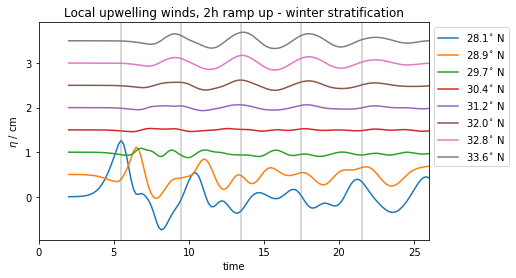

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind, off in zip(etas, inds, range(len(etas))):
    ax1.plot(2+time/3600,(0.5*off)+(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])
for ii in range(5):
    ax1.axvline(5.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,26)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Local upwelling winds, 2h ramp up - winter stratification')

### Check boundaries

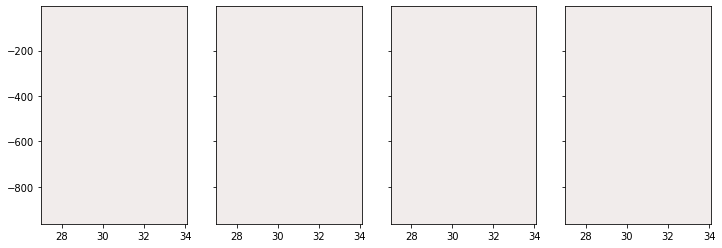

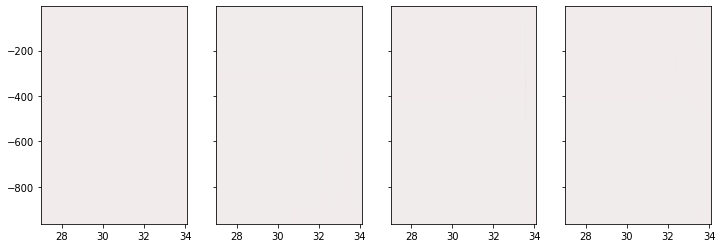

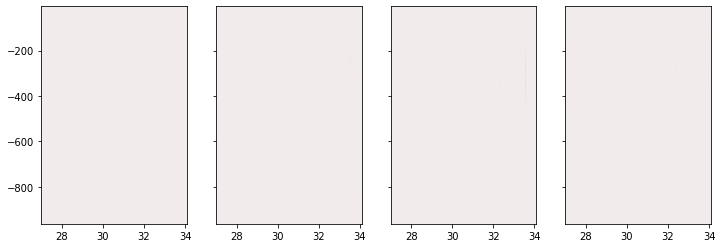

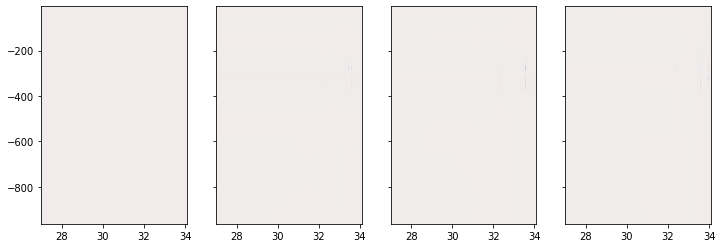

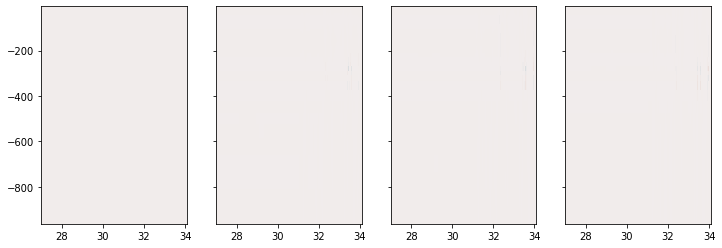

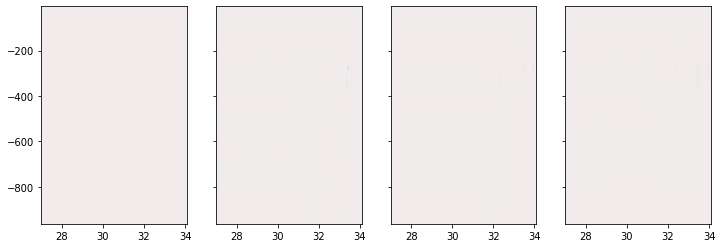

In [19]:
for tt in [0,5,10,30,50,70]:
    with Dataset(state_file1, 'r') as nbl:
        U0 = nbl.variables['U'][tt,:,:,1]
        U1 = nbl.variables['U'][tt,:,:,2]
        U2 = nbl.variables['U'][tt,:,:,3]
        U3 = nbl.variables['U'][tt,:,:,4]

    fig,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(12,4), sharey=True)
    ax0.pcolormesh(lat,Z,U0*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax1.pcolormesh(lat,Z,U1*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax2.pcolormesh(lat,Z,U2*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax3.pcolormesh(lat,Z,U3*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)


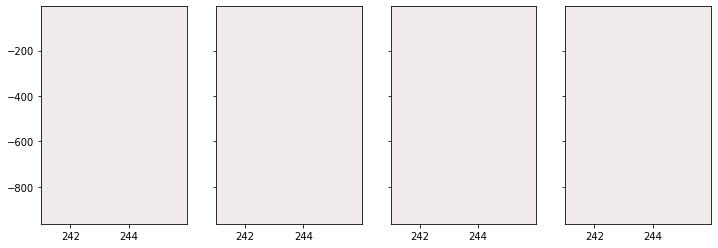

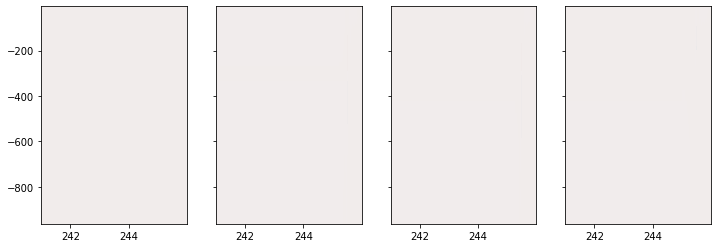

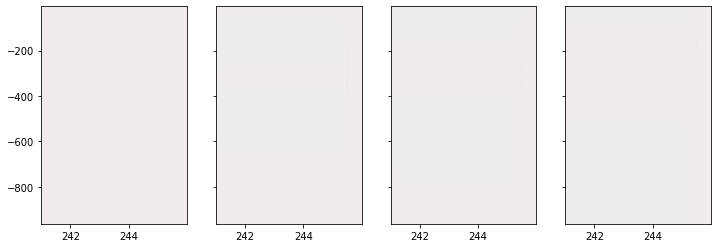

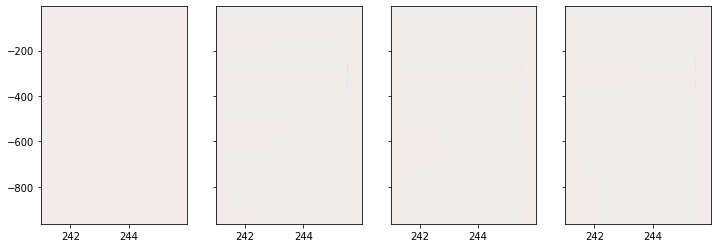

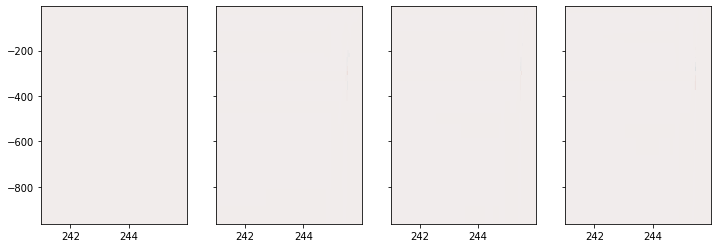

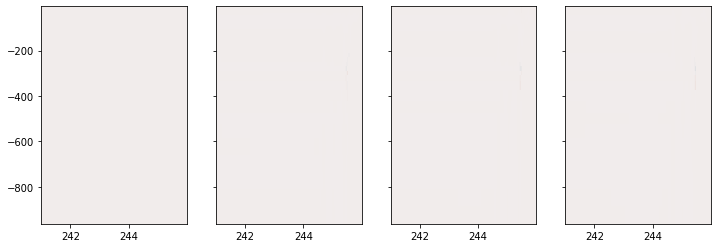

In [20]:
for tt in [0,5,10,30,50,70]:
    with Dataset(state_file1, 'r') as nbl:
        V0 = nbl.variables['V'][tt,:,1,:]
        V1 = nbl.variables['V'][tt,:,2,:]
        V2 = nbl.variables['V'][tt,:,3,:]
        V3 = nbl.variables['V'][tt,:,4,:]

    fig,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(12,4), sharey=True)
    ax0.pcolormesh(lon,Z,V0*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax1.pcolormesh(lon,Z,V1*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax2.pcolormesh(lon,Z,V2*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)
    ax3.pcolormesh(lon,Z,V3*100,vmin=-1, vmax=1,cmap=cmo.cm.balance)


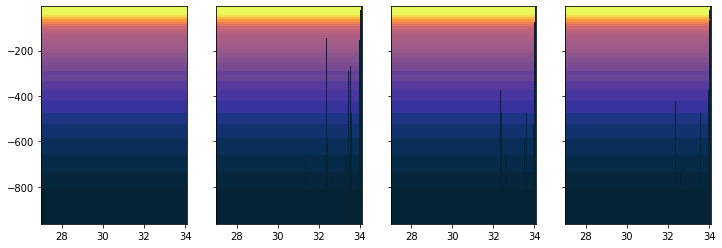

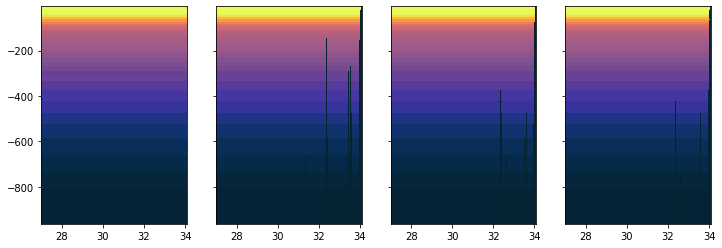

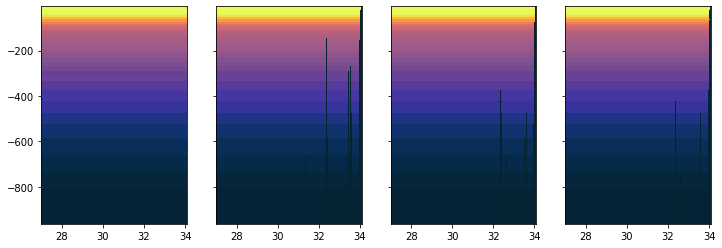

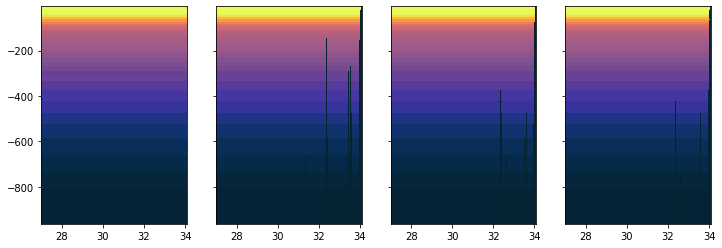

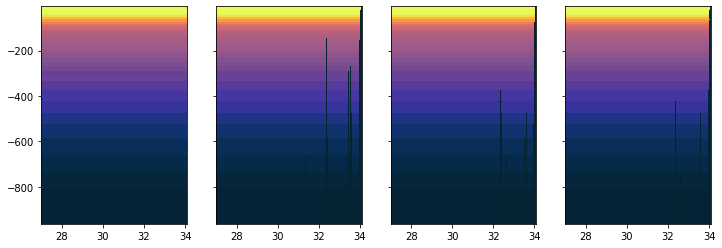

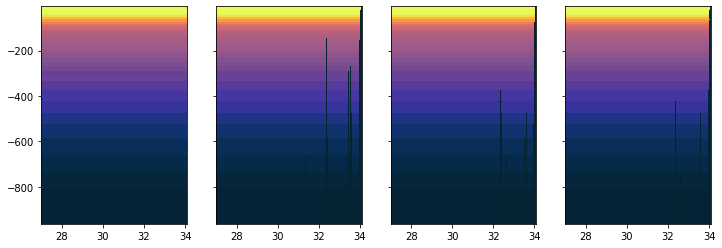

In [25]:
for tt in [0,5,10,30,50,70]:
    with Dataset(state_file1, 'r') as nbl:
        U0 = nbl.variables['Temp'][tt,:,:,0]
        U1 = nbl.variables['Temp'][tt,:,:,1]
        U2 = nbl.variables['Temp'][tt,:,:,3]
        U3 = nbl.variables['Temp'][tt,:,:,4]

    fig,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(12,4), sharey=True)
    ax0.pcolormesh(lat,Z,U0,vmin=4.3, vmax=15.6,cmap=cmo.cm.thermal)
    ax1.pcolormesh(lat,Z,U1,vmin=4.3, vmax=15.6,cmap=cmo.cm.thermal)
    ax2.pcolormesh(lat,Z,U2,vmin=4.3, vmax=15.6,cmap=cmo.cm.thermal)
    ax3.pcolormesh(lat,Z,U3,vmin=4.3, vmax=15.6,cmap=cmo.cm.thermal)


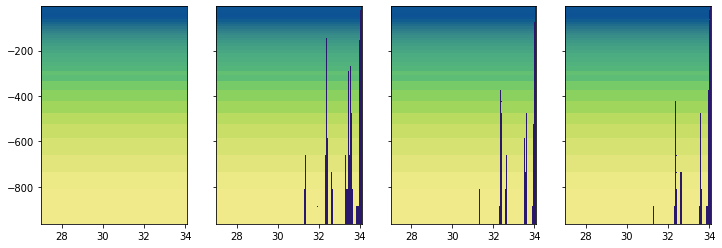

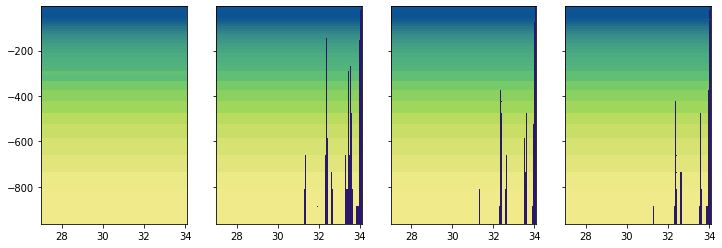

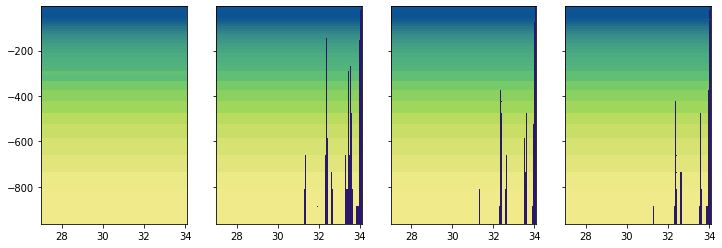

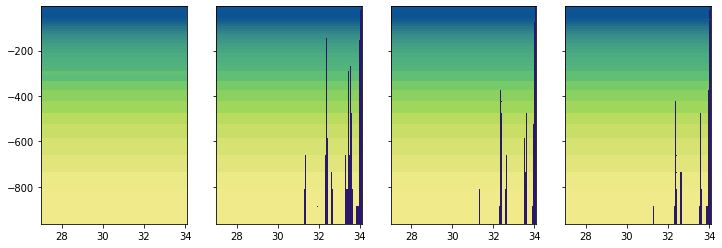

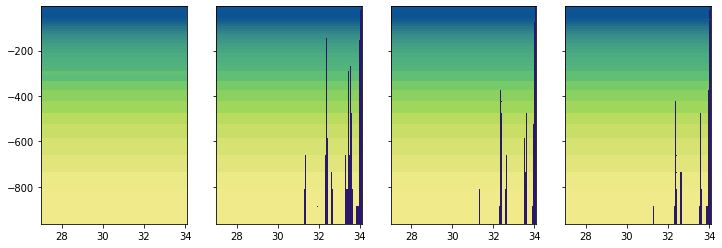

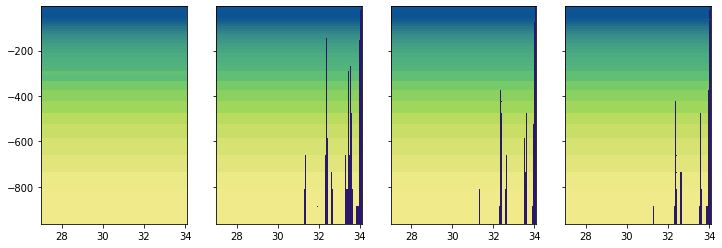

In [26]:
for tt in [0,5,10,30,50,70]:
    with Dataset(state_file1, 'r') as nbl:
        U0 = nbl.variables['S'][tt,:,:,0]
        U1 = nbl.variables['S'][tt,:,:,1]
        U2 = nbl.variables['S'][tt,:,:,3]
        U3 = nbl.variables['S'][tt,:,:,4]

    fig,(ax0,ax1,ax2,ax3) = plt.subplots(1,4,figsize=(12,4), sharey=True)
    ax0.pcolormesh(lat,Z,U0,vmin=33.5, vmax=34.5,cmap=cmo.cm.haline)
    ax1.pcolormesh(lat,Z,U1,vmin=33.5, vmax=34.5,cmap=cmo.cm.haline)
    ax2.pcolormesh(lat,Z,U2,vmin=33.5, vmax=34.5,cmap=cmo.cm.haline)
    ax3.pcolormesh(lat,Z,U3,vmin=33.5, vmax=34.5,cmap=cmo.cm.haline)
